In [11]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#training data
df = pd.read_csv("data/train.csv")

In [13]:
# Display column names
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [14]:
# Calculate survival rates by class
survival_rates = df.groupby("Pclass")["Survived"].mean()

/var/folders/24/2qj8cf9n16d93g54vqfy449m0000gn/T/ipykernel_51020/1277290271.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=survival_rates.index, y=survival_rates.values, ci=None, palette="Blues", order=[1, 2, 3])


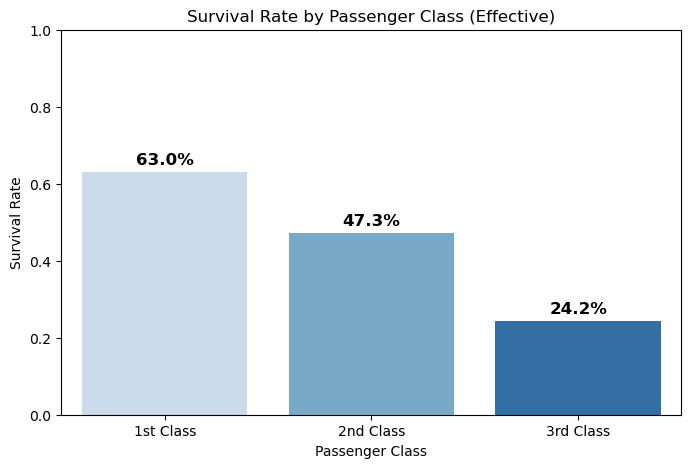

In [15]:
# Effective Visualization: 
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=survival_rates.index, y=survival_rates.values, ci=None, palette="Blues", order=[1, 2, 3])
plt.title("Survival Rate by Passenger Class (Effective)")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"])
plt.ylim(0, 1)


for i, v in enumerate(survival_rates.values):
    ax.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

This is an effective Visualization(Bar Chart):
- Each passenger class presents the percentage which makes it clear the percentage of the survival rate by passenger, which allows easy comparison. It was also arrenged so that the classes how in descendent order allowing for the natural hierarchy, blue tones where selected so that there was a clear differenciation making the darkest color the one with the lowest survival rate, and lighter for the highest survival rate. 

<Figure size 800x500 with 0 Axes>

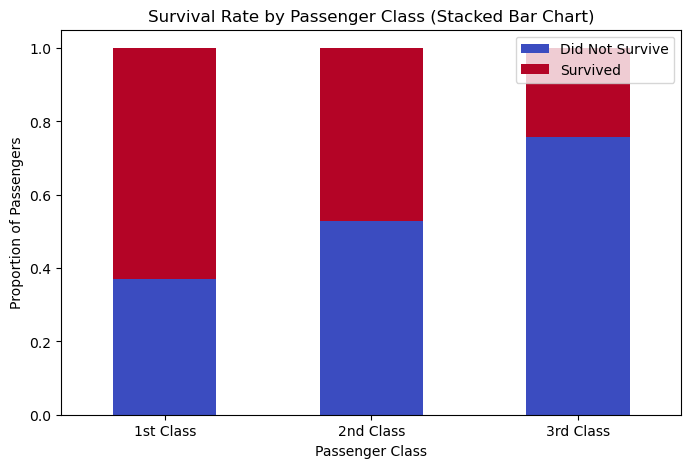

In [17]:
# Stacked Bar Chart - Effective Visualization
plt.figure(figsize=(8, 5))
class_survival = df.groupby("Pclass")["Survived"].value_counts(normalize=True).unstack()
class_survival.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("Survival Rate by Passenger Class (Stacked Bar Chart)")
plt.xlabel("Passenger Class")
plt.ylabel("Proportion of Passengers")
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"], rotation=0)
plt.legend(["Did Not Survive", "Survived"], loc="upper right")
plt.show()


- This is another Effective visualization: 

    This is also effective since it clearly and effectively shows both survivors and non survival proportions.This shows that 1st Class passengers had a significant survival rate than the other classes. The colors used were picked to show the distiction, avoiding any misleading data and keeping the classes in cronological order to maintain logical flow.  

/var/folders/24/2qj8cf9n16d93g54vqfy449m0000gn/T/ipykernel_51020/3488029729.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=survival_rates.index[::-1], y=survival_rates.values[::-1], ci=None, palette="Greys", order=[3, 2, 1])


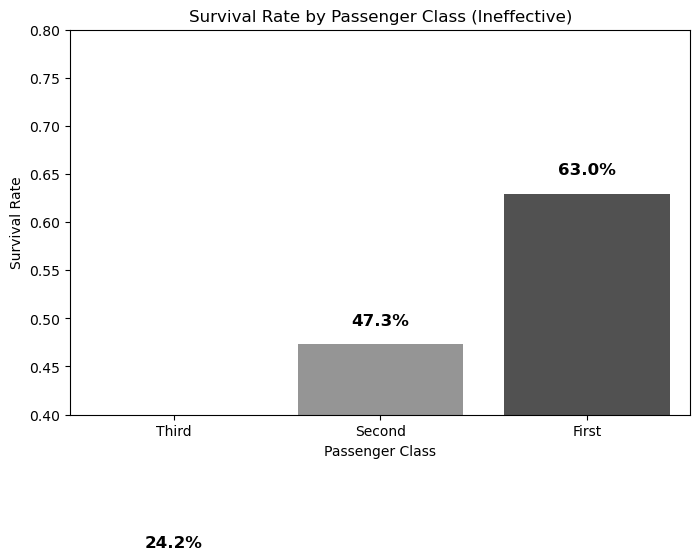

In [16]:
# Ineffective Visualization:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=survival_rates.index[::-1], y=survival_rates.values[::-1], ci=None, palette="Greys", order=[3, 2, 1])
plt.title("Survival Rate by Passenger Class (Ineffective)")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(ticks=[0, 1, 2], labels=["Third", "Second", "First"])  # Unclear labeling
plt.ylim(0.4, 0.8)  # Truncated Y-axis misleads by exaggerating differences

for i, v in enumerate(survival_rates.values[::-1]):
    ax.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

Ineffective Visualization(Bar Plot):
    What makes this innefective is that passenger classes have been reversed, making the data confusing since people expect data in chronological order. The y-axis was truncated (0.4,0.8) just to make the difference a lot more significant since it cuts part of the scale allowing for the percentages to look more drastic than they actually are. The tones picked make it confusing by not allowing obvious difference between the data being compared. Finally words were added instead of number to make the data more confusing between the survival rate classes.

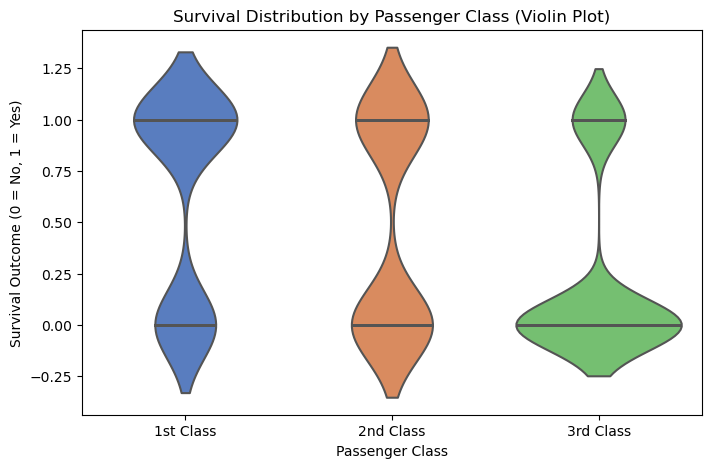

In [18]:
# Violin Plot - Alternative Visualization
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["Pclass"], y=df["Survived"], palette="muted", inner="stick")
plt.title("Survival Distribution by Passenger Class (Violin Plot)")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Outcome (0 = No, 1 = Yes)")
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"])
plt.show()

- This is another innefective Plot:

    The violin plot shows the distribution of survival outcomes across different passenger classes,showing density and variability. This makes it difficult for people to interpret the data, the shape of the violin is supposed to indicate where most data points are concentrated but this makes it a lot more confusing to interpret the data and what it is trying to transmit. This makes this plot not the best to show survival rates of passenger classes.